In [2]:
import pandas as pd
import pandas.io.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [3]:
# get data from yahoo finance
def get_data(symbol, start, end):
    return web.DataReader(symbol, 'yahoo', start, end)
symbol = '002022.SZ'
start = '20050101'
end = '20131231'
data = get_data(symbol, start, end)

In [4]:
def tr(data):
    ''' generate true range TR tech signal'''
    name = 'prev_value'
    data[name] = data.shift(1).Close
    hh = data[['High', name]].max(axis=1)
    ll = data[['Low', name]].min(axis=1)
    del data[name]
    return(hh -ll)

tr(data)
data['TR'] = tr(data)

In [5]:
def ma(data, timespan):
    return pd.rolling_mean(data['Adj Close'], timespan)
short_span = 30
long_span = 100
data['sma'] = ma(data, short_span)
data['lma'] = ma(data, long_span)

In [6]:
data['atr'] = pd.rolling_mean(data['TR'], short_span)
data.tail

<bound method DataFrame.tail of              Open   High    Low  ...     sma    lma   atr
Date                             ...                     
2005-01-03  15.63  15.80  15.55  ...     NaN    NaN   NaN
2005-01-04  15.46  15.70  15.31  ...     NaN    NaN   NaN
2005-01-05  15.50  15.88  15.42  ...     NaN    NaN   NaN
2005-01-06  15.65  15.85  15.55  ...     NaN    NaN   NaN
2005-01-07  15.79  15.86  15.50  ...     NaN    NaN   NaN
...           ...    ...    ...  ...     ...    ...   ...
2013-12-25  16.82  16.82  16.82  ...   16.01  15.76  0.42
2013-12-26  16.82  16.82  16.82  ...   16.06  15.75  0.40
2013-12-27  16.82  16.82  16.82  ...   16.10  15.75  0.39
2013-12-30  16.82  16.82  16.82  ...   16.14  15.74  0.37
2013-12-31  16.82  16.82  16.82  ...   16.18  15.73  0.36

[2306 rows x 10 columns]>

In [7]:
data.drop(data[0:long_span].index, inplace = True)
data.head

<bound method DataFrame.head of              Open   High    Low  ...     sma    lma   atr
Date                             ...                     
2005-05-23  10.70  10.70  10.26  ...    1.78   1.56  0.51
2005-05-24  10.24  10.76  10.21  ...    1.78   1.56  0.51
2005-05-25  10.65  10.71  10.50  ...    1.77   1.56  0.50
2005-05-26  10.56  10.73  10.35  ...    1.75   1.56  0.47
2005-05-27  10.30  10.52  10.20  ...    1.73   1.56  0.46
...           ...    ...    ...  ...     ...    ...   ...
2013-12-25  16.82  16.82  16.82  ...   16.01  15.76  0.42
2013-12-26  16.82  16.82  16.82  ...   16.06  15.75  0.40
2013-12-27  16.82  16.82  16.82  ...   16.10  15.75  0.39
2013-12-30  16.82  16.82  16.82  ...   16.14  15.74  0.37
2013-12-31  16.82  16.82  16.82  ...   16.18  15.73  0.36

[2206 rows x 10 columns]>

In [8]:
def gen_sig(data):
    data['sig']= 0
    data.loc[data.sma > data.lma, 'sig'] = 1

gen_sig(data)
data.tail(n=20)


             Open   High    Low ...     lma   atr  sig
Date                            ...                   
2013-12-04  16.67  17.09  16.60 ...   15.81  0.48    0
2013-12-05  16.60  16.76  16.36 ...   15.82  0.49    0
2013-12-06  16.50  16.65  16.26 ...   15.82  0.46    0
2013-12-09  16.30  17.06  16.30 ...   15.81  0.47    0
2013-12-10  17.00  17.08  16.75 ...   15.80  0.45    0
...           ...    ...    ... ...     ...   ...  ...
2013-12-25  16.82  16.82  16.82 ...   15.76  0.42    1
2013-12-26  16.82  16.82  16.82 ...   15.75  0.40    1
2013-12-27  16.82  16.82  16.82 ...   15.75  0.39    1
2013-12-30  16.82  16.82  16.82 ...   15.74  0.37    1
2013-12-31  16.82  16.82  16.82 ...   15.73  0.36    1

[20 rows x 11 columns]

In [16]:
entry_days = data[data.sig > data.sig.shift()].index
i = data.index.get_loc(entry_days[0])
data[i-2 :i + 20]

             Open   High    Low ...    lma   atr  sig
Date                            ...                  
2005-07-14  11.14  11.34  11.12 ...   1.65  0.52    0
2005-07-15  11.29  11.29  10.90 ...   1.65  0.52    0
2005-07-18  10.91  11.00  10.84 ...   1.65  0.51    1
2005-07-19  10.92  11.16  10.90 ...   1.65  0.51    1
2005-07-20  11.00  11.26  10.96 ...   1.65  0.48    1
...           ...    ...    ... ...    ...   ...  ...
2005-08-08  13.80  14.28  13.62 ...   1.69  0.44    1
2005-08-09  13.74  14.54  13.71 ...   1.70  0.45    1
2005-08-10  13.96  14.00  13.61 ...   1.70  0.46    1
2005-08-11  13.91  14.09  13.71 ...   1.71  0.45    1
2005-08-12  14.02  14.49  13.75 ...   1.72  0.46    1

[22 rows x 11 columns]

In [15]:
exit_days = data[data.sig < data.sig.shift()].index
exit_days[1]

i = data.index.get_loc(exit_days[0])
data[i-2 :i + 20]

             Open   High    Low ...    lma   atr  sig
Date                            ...                  
2005-06-14  10.55  10.68  10.18 ...   1.58  0.46    1
2005-06-15  10.16  10.39   9.96 ...   1.58  0.46    1
2005-06-16  10.18  10.75  10.11 ...   1.58  0.47    0
2005-06-17  10.69  10.80  10.35 ...   1.59  0.47    0
2005-06-20  10.65  11.30  10.55 ...   1.59  0.47    0
...           ...    ...    ... ...    ...   ...  ...
2005-07-07  10.60  10.78  10.55 ...   1.64  0.51    0
2005-07-08  10.77  10.77  10.42 ...   1.64  0.51    0
2005-07-11  10.68  10.97  10.53 ...   1.64  0.52    0
2005-07-12  10.65  11.39  10.51 ...   1.65  0.53    0
2005-07-13  11.23  11.36  11.06 ...   1.65  0.52    0

[22 rows x 11 columns]

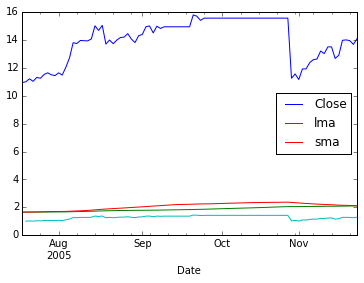

In [30]:
from datetime import timedelta 
def get_trans(data, index, entry_days, exit_days):
    start_date = entry_days[index]
    end_date = exit_days[index]
    if start_date > end_date and index < len(exit_days)-1:
        end_date = exit_days[index + 1]
    elif start_date > end_date:
        end_date = data.index[-1]
    
    end_date = end_date - timedelta(days=1)
    return data[start_date : end_date ].copy()

#print(entry_days[0], exit_days[0])
#entry_days[0] > exit_days[0]
get_trans(data, 0, entry_days, exit_days)


trans_1 = get_trans(data, 0, entry_days, exit_days)
price_change = trans_1['Adj Close'].pct_change()
ret = ( price_change + 1).cumprod()
trans_1[['Close', 'lma', 'sma']].plot()
ret.plot()

# and ax2 is in the lower row

In [81]:
def get_first_date(dates):
    if len(dates) > 0 :
        return dates[0]
    else:
        return None
    
def get_not_none_date(date1, date2):
    if date1 is None:
        return date2
    else:
        return date1

def get_stopl_date(data, stop_at_pct):
    '''获取止损时间
    data 交易信号存在数据
    stop_at_pct 止损百分比
    '''
    data['cum_prod'] = (data['Adj Close'].pct_change() + 1).cumprod()
    stops = data[data.cum_prod < stop_at_pct].index
    return get_not_none_date(get_first_date(stops), data.index[-1])
  
# test for get_stopl_date function
trans2 = get_trans(data, 1, entry_days, exit_days)
print(get_stopl_date(trans2, 0.97))
np.min(trans2.cum_prod)



2006-02-20 00:00:00


0.9606982887332033

In [82]:

def get_trailstop_date(data, trailstop):
    '''获取跟踪止损日期'''
    
    data['cum_max'] = data['Close'].cummax()
    stops = data[data['cum_max']-data['Close'] > trailstop].index
    return get_not_none_date(get_first_date(stops), data.index[-1])

trailstop =  trans2.iloc[0].atr
print(trailstop)
ts_at = get_trailstop_date(trans2, trailstop)
print(ts_at)
if not ts_at is None:
   print(trans2.loc[ts_at, 'cum_max'], trans2.loc[ts_at, 'Close'])

trans2['Close']

0.488331666667
2006-02-16 00:00:00
(15.279999999999999, 14.49001)


Date
2006-02-03    14.25
2006-02-06    14.69
2006-02-07    14.33
2006-02-08    14.57
2006-02-09    14.68
              ...  
2006-08-14    11.05
2006-08-15    11.20
2006-08-16    11.41
2006-08-17    11.20
2006-08-18    11.24
Name: Close, dtype: float64

In [148]:
stoplevel = 0.95
ts_factor = 1

    
for i in range(0, len(entry_days)):
    tran = get_trans(data, i, entry_days, exit_days)
    
    stop_at = get_stopl_date(tran, 0.95)
    trailstop = ts_factor* tran.iloc[0].atr
    trails_at = get_trailstop_date(tran, trailstop)
    real_stop_at = min(stop_at, trails_at)
    
    tran[]plot()
    

In [149]:
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0))
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))

vkhsw[['norm_ret', 'ret']].plot(ax = ax1)
vkhsw[[ 'long_ma', 'short_ma']].plot(ax = ax2)
trans_count = vkhsw[vkhsw.sig > vkhsw.shift().sig]

7

In [80]:
trans2.index[-1]

Timestamp('2006-08-18 00:00:00')

In [151]:
exit_count = vkhsw[vkhsw.sig < vkhsw.shift().sig]
exit_count.count()

Open        7
High        7
Low         7
Close       7
Volume      7
           ..
TR          7
ATR         7
sig         7
ret         7
norm_ret    7
dtype: int64

In [152]:
trans_idx = (trans_count + exit_count).index

In [153]:
max_return = pd.Series([0.0]*len(trans_count))
max_drawdown = max_return.copy()
exit_return = max_drawdown.copy()
max_return

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: float64

In [154]:
for i in range(0, len(trans_idx)//2):
    idx = i *2
    trading_days = vkhsw[trans_idx[idx]:trans_idx[idx+1] ].copy()
    day_len = len(trading_days)
    trading_days.ret = (1+trading_days["Adj Close"].pct_change()).cumprod()
    trading_days.norm_ret = trading_days.ret /trading_days.ret.cummax()#use to calc rolling max
    max_return[i], max_drawdown[i], exit_return[i] = trade_summ(trading_days, trans_idx[idx+1])

In [155]:
trade_summary = pd.DataFrame([max_return, max_drawdown, exit_return])
trade_summary

      0     1     2  ...      4     5     6
0  1.27  0.98  1.14  ...   1.49  1.23  2.28
1  0.29  0.07  0.16  ...   0.23  0.20  0.53
2  0.91  0.91  1.02  ...   1.31  1.05  1.17

[3 rows x 7 columns]

In [29]:
last_return = exit_return.cumprod()

In [80]:

def trade_summ( data, at):
    max_ret = np.max(data.ret)
    max_dd = 1 - np.min(data.norm_ret)
    exit_ret = data.ret.loc[at]
    return (max_ret, max_dd, exit_ret)

In [122]:

stoploss = 0.95
for i in range(0, len(trans_idx)//2):
    idx = i *2
    trading_days = vkhsw[trans_idx[idx]:trans_idx[idx+1] ].copy()
    day_len = len(trading_days)
    trading_days.ret = (1+trading_days["Adj Close"].pct_change()).cumprod()
    trading_days.norm_ret = trading_days.ret /trading_days.ret.cummax()#use to calc rolling max
    
    # stop loss filter
    trading_days['stopex'] = 0 
    trading_days.loc[trading_days.ret < stoploss, 'stopex'] = 1
    stop_at = trading_days[trading_days.stopex == 1].index.min()
    print stop_at
    
    # trailing stop filter
    tr_stop = 3 * trading_days.loc[ trans_idx[idx], 'ATR']
    tr_sig = abs(trading_days.Close - trading_days.Close.cumsum()) > tr_stop 
    
    if  not stop_at.year > 0: stop_at = trans_idx[idx+1]
    stop_tds = trading_days[:stop_at].copy()            
    max_return[i], max_drawdown[i], exit_return[i] = trade_summ(stop_tds, stop_at)
    


2011-01-17 00:00:00
2011-12-13 00:00:00
2012-05-25 00:00:00
NaT
NaT
NaT
NaT


In [165]:
test = vkhsw['20111206': '20111220'].copy()
# test for trailing stop
test.loc[abs(test.Close - test.Close.cummax())>1, 'sig'] =1 

In [133]:
test['prevClose'] = test.shift(1).Close
test

             Open   High    Low    ...      norm_ret  stopex  prevClose
Date                               ...                                 
2011-12-06  12.30  12.45  12.16    ...          0.87       1        NaN
2011-12-07  12.42  12.75  12.35    ...          0.89       1      12.38
2011-12-08  12.51  12.66  12.16    ...          0.87       1      12.61

[3 rows x 14 columns]

In [135]:
test[['High', 'prevClose']].max(axis=1) - test[['Low', 'prevClose']].min(axis=1)

Date
2011-12-06    0.29
2011-12-07    0.40
2011-12-08    0.50
dtype: float64

In [166]:
test

             Open   High    Low    ...     sig   ret  norm_ret
Date                               ...                        
2011-12-06  12.30  12.45  12.16    ...       0  0.92      0.87
2011-12-07  12.42  12.75  12.35    ...       1  0.94      0.89
2011-12-08  12.51  12.66  12.16    ...       1  0.92      0.87
2011-12-09  12.18  12.42  12.16    ...       1  0.91      0.86
2011-12-12  12.23  12.39  12.20    ...       1  0.91      0.86
...           ...    ...    ...    ...     ...   ...       ...
2011-12-14  11.90  12.05  11.77    ...       1  0.88      0.83
2011-12-15  11.73  11.88  11.11    ...       1  0.88      0.81
2011-12-16  11.44  11.68  11.15    ...       0  0.88      0.82
2011-12-19  11.48  11.62  11.19    ...       1  0.88      0.81
2011-12-20  11.58  11.88  11.50    ...       0  0.88      0.82

[11 rows x 15 columns]